In [55]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt


# Loading the data

In [56]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape , y_train.shape

((50000, 32, 32, 3), (50000, 1))

# Exploring about the data

In [57]:
X_train[0][0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

In [58]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [59]:
y_train = y_train.reshape(y_train.shape[0])
y_train.shape

(50000,)

In [60]:
y_test = y_test.reshape(y_test.shape[0])
y_test.shape

(10000,)

In [61]:
def figure_plot(index):
    plt.figure(figsize = (5,2))
    plt.imshow(X_train[index])
    plt.xlabel(classes[y_train[index]])

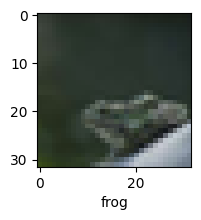

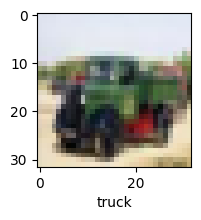

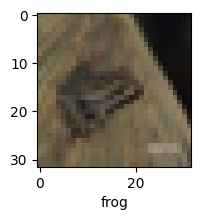

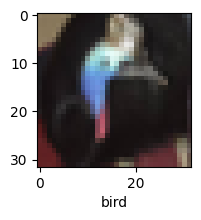

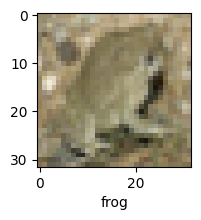

In [62]:
import random
for i in range(5):
    j = random.randint(0, X_train.shape[0])
    figure_plot(j)

In [63]:
#Normalizing the data
X_train = X_train/255
X_test = X_test / 255

In [67]:
X_train.min()

0.0

In [69]:
X_train.shape

(50000, 32, 32, 3)

In [74]:
model = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(2000,activation = 'relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='tanh')
])

In [82]:
model.compile(loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [83]:
model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 103s 66ms/step - loss: 5.0449 - accuracy: 0.0998 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 2/5
1563/1563 [==============================] - 100s 64ms/step - loss: 2.3026 - accuracy: 0.0998 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 3/5
1563/1563 [==============================] - 101s 65ms/step - loss: 2.3026 - accuracy: 0.0998 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 4/5
1563/1563 [==============================] - 100s 64ms/step - loss: 2.3026 - accuracy: 0.0998 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 5/5
1563/1563 [==============================] - 103s 66ms/step - loss: 2.3026 - accuracy: 0.0998 - val_loss: 2.3026 - val_accuracy: 0.1001


In [86]:
#CNN
cnn = models.Sequential([
    layers.Conv2D(filters=30,kernel_size = (2,2),activation='relu',input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=60,kernel_size = (2,2),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation = 'softmax')
])

In [90]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [94]:
cnn.fit(X_train,y_train,epochs=5,validation_data = (X_test, y_test) )

Epoch 1/5
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7295 - accuracy: 0.7451 - val_loss: 0.8992 - val_accuracy: 0.6909
Epoch 2/5
1563/1563 [==============================] - 18s 11ms/step - loss: 0.6948 - accuracy: 0.7576 - val_loss: 0.9018 - val_accuracy: 0.6847
Epoch 3/5
1563/1563 [==============================] - 18s 11ms/step - loss: 0.6586 - accuracy: 0.7707 - val_loss: 0.9185 - val_accuracy: 0.6861
Epoch 4/5
1563/1563 [==============================] - 18s 12ms/step - loss: 0.6267 - accuracy: 0.7820 - val_loss: 0.9067 - val_accuracy: 0.6947
Epoch 5/5
1563/1563 [==============================] - 18s 12ms/step - loss: 0.5953 - accuracy: 0.7928 - val_loss: 0.9408 - val_accuracy: 0.6950


In [95]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.9408 - accuracy: 0.6950


[0.9408475756645203, 0.6949999928474426]

In [98]:
y_pred = cnn.predict(X_test)


313/313 [==============================] - 2s 8ms/step


In [110]:
np.argmax(y_pred[0])

8

In [114]:
for element in range(5):
    print(np.argmax(y_pred[element]))

8
8
0
0
6


In [107]:

y_pred_class = [np.argmax(y_pred[element] for element in range(5))]
y_pred_class

[0]

In [116]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)